<a href="https://colab.research.google.com/github/RegaipKURT/Machine-Learning-Python/blob/master/Entropy_and_CrossEntropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entropy, Cross Entropy

Entropi belirli bir anda bir sistemin içinde bulunabileceği muhtemel durumların bir ölçümüdür. Başka bir ifadeyle bir sistemin düzensizliğinin ölçümüdür de diyebiliriz. Çünkü sistemlerin içinde bulunabileceği muhtemel durumlar arttıkça o sistemin daha düzensiz olduğunu düşünebiliriz. **Fakat burada dikkat etmemiz gereken iki nokta var:**
1.   Bu sistemin düzensiz olduğunu söyleyebilmek için **muhtemel durumlardan hangisinde bulunacağını ya hiç bilmememiz ya da olasılıksal olarak bilmemiz gerekir.** Çünkü birçok muhtemel durumdan hangisinde bulunacağını kesin olarak biliyorsak burada bir düzensizlikten bahsedemeyiz. Gerçekleşecek durumu önceden bilmeye yarayan bir yöntem varsa, bu sistemde hiçbir düzensizlik yoktur. Tersine tam bir düzen vardır. Eğer söz konusu sistemin bu durumlardan bir tanesinde daha yüksek ihtimalle olacağını biliyorsak, o zaman düzensizlik azalacağından ya da sisteme dair bilgimiz biraz olsun artmış olacağından entropi de azalmıştır diyebiliriz. Çünkü artık ihtimaller eşit değildir. Farklı durumlardan hangisinin gerçekleşebileceğine dair bir öngörü veya bilgi kazanmış oluruz. 

     
2.   Muhtemel durumların sayısı artarken entropi artar. Çünkü sistemin içinde bulunabileceği muhtemel durumlar artar. Dolayısıyla bu sistem muhtemel ihtimallerin herhangi birinde bulunabilir ama bizim tahmin gücümüz de giderek azalır. Tabi burada bütün ihtimallerin gerçekleşme olasılığı eşitse bilgimiz azalacaktır. Eğer muhtemel durumların sayısı artmış olmasına rağmen belirli bir ihtimalin gerçekleşme olsaılığı diğerlerinden yüksek olmuşsa, bu sefer entropinin azalması da mümkündür.


Yukarıda bahsettiğimiz iki durumda da ortak olan ifade duruma dair bilgimizdir. İlkinde, ihtimallerin olasılık dağılımı bilgimizi etkilerken, ikincisinde ise ihtimallerin artması veya azalması bilgimizi etkiler. Öyleyse entropi bu iki durumun bir birleşimi olmalıdır. Yani muhtemel durumların sayısıyla bir şekilde orantılıdır ve ihtimallerin olasılık dağılımından da etkilenmektedir.

Bu anlattıklarımızdan entropinin az çok hesaplanabilir bir ifade olduğunu çıkarabiliriz. Peki ama bizi entropiye veya onun hesaplanabilir matematiksel ifadesine ulaştıracak yol nedir? Bilimin yolundan gidersek, deney yapabiliriz ve sonuçta gözlemlerimizi matematiksel bir ifadeye dökebiliriz. Elimizin altındaki bilgisayarlar ile birçok deney gerçekleştirip, gözlemlerimizi formüle edebiliriz. Bunun için biz python ile farklı durumları görselleştirip anlayarak, devam edeceğiz. En sonunda da entropiyi hesaplamak için bir formül bulmaya çalışacağız. 

Farklı durumları hesaplamak için ilk başta paralarla sonra da zarlarla bir sistem kurup inceleyelim.


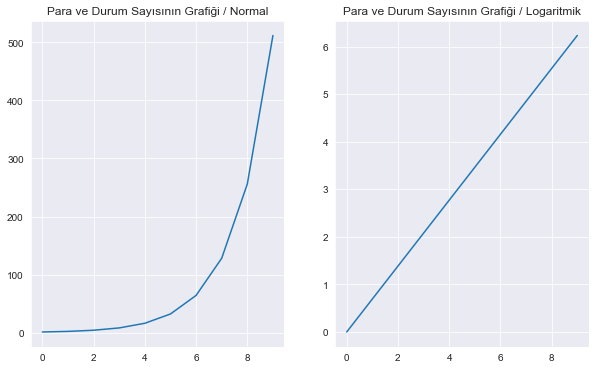

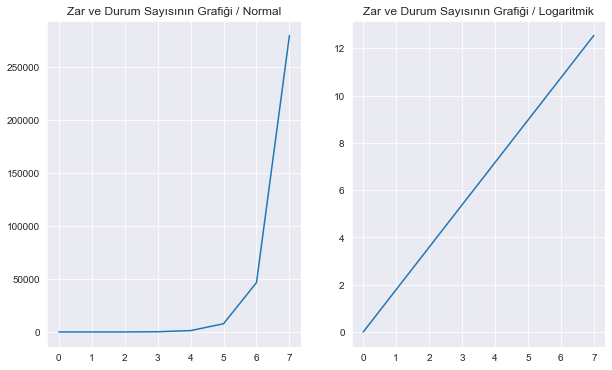

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("darkgrid")

# şimdi kaç tane para atarsak kaç tane muhtemel durum oluşacağını bulmaya çalışalım.
# sırasıyla 1'den 10'a kadar paraları aynı andan attığımızda gerçekleşebilecek kaç muhtemel durum olur.
coins = [2 ** i for i in range(10)]

plt.figure(figsize=(10,6)) 
#gerçekleşecek durumlardaki artışın grafiği
plt.subplot(1,2,1)
sns.lineplot(x=list(range(0,len(coins))), y=coins)
plt.title("Para ve Durum Sayısının Grafiği / Normal")
plt.subplot(1,2,2)
sns.lineplot(x=list(range(0,len(coins))), y=np.log(coins))
plt.title("Para ve Durum Sayısının Grafiği / Logaritmik")
# x ekseninde atılan para sayısı, y ekseninde gerçekleşebilecek muhtemel durumların sayısı görülecek.
plt.show()


# şimdi atılacak zar sayısına göre muhtemel durumların sayısını bulmaya çalışalım.
# sırasıyla 1'den 10'e kadar zarları aynı andan attığımızda gerçekleşebilecek kaç muhtemel durum olur.
dices = [6 ** i for i in range(8)]

plt.figure(figsize=(10,6)) 
#gerçekleşecek durumlardaki artışın grafiği
plt.subplot(1,2,1)
sns.lineplot(x=list(range(0,len(dices))), y=dices)
plt.title("Zar ve Durum Sayısının Grafiği / Normal")
plt.subplot(1,2,2)
sns.lineplot(x=list(range(0,len(dices))), y=np.log(dices))
plt.title("Zar ve Durum Sayısının Grafiği / Logaritmik")
# x ekseninde atılan zar sayısı, y ekseninde gerçekleşebilecek muhtemel durumların sayısı görülecek.

plt.show()


Şimdi biz entropinin maksimum olduğu durumu 1 ile minimum olduğu durumu da 0 ile göstermek isteyelim. Biliyoruz ki her durumun gerçekleşme ihtimalinin birbirine eşit olduğu durumda entropi maksimum yani 1 olmalıdır. Tek bir durumun gerçekleşme ihtimali 1 diğer tüm durumlarınki 0 ise o zaman da entropinin 0 olması gerektiğini hayal edebiliyorum. Çünkü burada herhangi bir belirsizlik yoktur. O zaman logaritma kullanarak bir denklem kurarsam sonuca ulaşabilirim diye düşünüyorum. Çünkü yukarıdaki logaritma grafiğinde logaritmik durum sayısının doğrusal bir seyri var ve eğer bu durum sayısını, durum sayısına bölersem 1 sayısına ulaşırım. Yani entropinin maksimum olduğunu düşündüğüm duruma ulaşırım. Fakat ben olayların gerçekleşme ihtimalini kullanarak aynı sonuca ulaşmak istediğim için olayların gerçekleşme ihtimali ile bir ifade kurmak istiyorum. 

Bu durumda ilk önce bir paranın atılınca yazı veya tura gelme olasılığı için denklem kuralım. Bu denklemde de girdiler ihtimalleri içersin ve sonuç bana 1 sayısını versin. İlk aklıma gelen denklem şöyle:

# 1 = -( (log w (1 / w) + -log w (1 / w)) ) / w 
Yukarıdaki denklemde w toplam durumların sayısı, (1 / w) ise olayın gerçekleşme ihtimalidir. Burada gerçekleşme ihtimalleri eşit olduğu için 1 / w yazabildim. Ama aslında kastettiğim şey olayın gerçekleşme ihtimalidir. Sonunda ise w yani toplam durum sayıyla bölerek 1'e ulaşmak istedim. 

Şimdi yukarıdaki denklemde toplam durum sayısına bölmek yerine her seferinde olayın gerçekleşme ihtimali ile de çarpableceğimi rahatlıkla düşünebilirim. Ayrıca madem ihtimali kullanacağım o zaman 1/W yerine de ihtimali temsil eden bir değer yazayım ki ihtimaller eşit olmadığı zamanda kullanabileceğim bir ifade belirtmiş olayım. O zaman yeni denklemim şöyle görünecektir.

# 1 = pi * (logw(pi) ) + py * logw(py)) 

Yukarıda artık hem ihtimalleri kullandım hem de en sonda w sayısına bölmekten kurtulmuş oldum. Şimdi bu denklemi toplam sembolüyle yazıp daha derli toplu bir hale getirelim ve sonuçtaki denklemim aşağıdaki gibi olsun. 

$$-\sum_{i\ =\ 1}^{i=w}{p(i)\ *\log}_w{p(i)}$$ 

Negatif çıkan sonuçları düzeltmek için toplamın başına - işareti koydum ve her şey yerli yerine oturdu.

Şimdi ilk önce ihtimallerin eşit olduğu bir parayı havaya atma durumu hesap yapıp sonucu kontrol edelim.

In [2]:
import math
S = ( 0.5 * -np.log2(0.5) ) + ( 0.5 *  -np.log2(0.5) )
print(SystemExit)

<class 'SystemExit'>


Görüyoruz ki paranın havaya atılmasında ve eşit ihtimal olduğunda denklem çalıştı. Şimdi başka bir durumu zar atmayı deneyim sonuca tekrar bakalım. 

In [3]:
import math 
# 6 tabanında logaritma kullanmak için math kütüphanesini import ediyorum.
p = 1 / 6 # bir yüzeyin gelme ihtimali ve hepsinde eşit olacak.

S = 6 * ( p *  -math.log(p, 6) ) # 6 kere toplamak yerine 6 ile çarptım. Çünkü ihtimaller eşit yoksa toplamam gerekirdi.

print(S)

1.0


Evet şimdi sonuç olarak kendime güzel bir denklem buldum gibi duruyor. Bu denklem 1 ile 0 arasında bir sayı dönderiyor ve 1 maksimum entropiyi anlatırken, 0 ise minimum entropiyi anlatıyor. Şimdi ihtimallerin eşit değil de farklı bir durumu test etmek için bu deklemi kullanalım. Biliyorum sadece 2 ihtimalin olduğu bir durumda ihtimaller eşit değilse entropi düşecektir, düşmelidir.

In [4]:
# bir para atıldığında hileli yüzey 0.75 ihtimalle geliyorsa denklemim

S = ( 0.75 * -np.log2(0.75) ) + ( 0.25 *  -np.log2(0.25) )
print(S)

0.8112781244591328


Şimdilik doğru gibi ama ben ihtimalleri değiştirdikçe nasıl olacağını görmek için entropiyi hesaplayan bir fonksiyon yazacağım. Bu kolaylık olması için fonksiyon sadece yazı tura atılan bir para için çalışacak olsun. 

In [5]:
def entropyForCoin(p=0.5): 
    # eşit olduğu durumda 0.5 değilse değiştirilebilir.
    p1 = p
    p2 = 1 - p

    S = ( p1 * -np.log2(p1) ) + ( p2 *  -np.log2(p2) )

    return S

Şimdi bir liste oluışturup sıralı şekilde her ihtimale göre nasıl bir grafik çıktığını görelim.

Text(0.5, 1.0, 'İhtimallerin Grafiği')

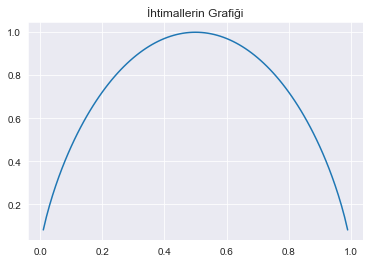

In [6]:
probs = list(np.arange(0.01, 1, 0.01))

results = [entropyForCoin(i) for i in probs]

sns.lineplot(x=probs, y=results)
plt.title("İhtimallerin Grafiği")

Sonuç tam da beklediğimiz gibi. Her iki ihtimalin de eşit olduğu durumda yani x = 0.5 noktasında entropi maksimum (1) değerini alırken ihtimallerden biri giderek yükselirken entropi de azalarak 0'a yaklaşmış. 

Sanıyorum söylemek istediklerimiz ve entropinin ne olduğu da bu şekilde anlaşılmış oldu. Aslında biz burada tek bir ihtimal yerine çoklu ihtimaller kullandığımız için crossentropy denilen şeyi de anlatmış olduk. Fakat esasen aynı kapıya çıktıklarını düşündüğüm için ayrıca bahsetmeye gerek duymuyorum. Sadece ihtimaller arasındaki değişimi işin içine kattığımızda aldığı isim crossentropy oluyor ki biz de zaten baştan beri bu ihtimali hesaba katarak hareket ettik. 

Yukarıda anlattıklarımı herhangi bir kaynaktan doğrulamadan ya da bir yerden öğrenmeden anlatıyorum. Fen Bilimleri konusunda da formel bir eğitimim olmadığı için yanılmış veya yanlış bir yaklaşım sergilemiş olabilirim. Sadece sezgisel olarak entropi olayına kendi yaklaşımımı belirtmiş bulunmaktayım ve eğer bilmeden hata yapmışsam hem özür diliyor hem de düzeltmenizi bekliyorum. 